

*   Sumber data: [https://www.kaggle.com/snap/amazon-fine-food-reviews](https://www.kaggle.com/snap/amazon-fine-food-reviews?select=Reviews.csv)
*   Referensi1: [https://www.kaggle.com/code/text-clustering](https://www.kaggle.com/code/karthik3890/text-clustering/notebook)
*   Referensi2: [https://www.kaggle.com/text-data-clustering](https://www.kaggle.com/akshatpathak/text-data-clustering)



# Clustering ilustrasi dengan tweet



**Cek Slide**

# Pre-processing dan Ekstraksi fitur data tekstual

### Pre-processing

In [1]:
# 1. Lower
# 2. Remove punctuation
# 3. Remove stopwords English

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Reviews1000.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
text = df["Text"]
text = list(text)
text[:5]

['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".',
 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.',
 'If you are looking f

In [5]:
# 1. Lower
low_text = []
for item in text:
    low_text.append(item.lower())
# 2. Remove punctuation
import re, string
regex = re.compile('[%s]' % re.escape(string.punctuation))
clean_text=[]
for item in low_text:
    clean_text.append(regex.sub('',item))

# 3. Remove stopwords English
from gensim.parsing.preprocessing import remove_stopwords

no_stopword=[]
for item in clean_text:
    no_stopword.append(remove_stopwords(item))

# 4. Remove digits
no_digits=[]
for item in no_stopword:
    no_digits.append(''.join([i for i in item if not i.isdigit()]))

# 5. Convert asci


In [6]:
import re, string
regex = re.compile('[%s]' % re.escape(string.punctuation))
from gensim.parsing.preprocessing import remove_stopwords
def preProcess(textString):
    textString = textString.lower()
    textString = regex.sub('', textString)
    textString = remove_stopwords(textString)
    textString = ''.join([i for i in textString if not i.isdigit()])
    textString = textString.replace('br','')
    return textString

Ulangi Preprocess dengan function

In [7]:
textClean = []
for review in text:
    textClean.append(preProcess(review))

In [8]:
textClean[:5]

['bought vitality canned dog food products good quality product looks like stew processed meat smells better laador finicky appreciates product better',
 'product arrived labeled jumbo salted peanutsthe peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'confection centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story cs lewis lion witch wardrobe treat seduces edmund selling other sisters witch',
 'looking secret ingredient robitussin believe got addition root beer extract ordered good cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']

**Pada tahap deployment**: Semua tahapan pre-processing di sini, juga harus dilakukan untuk data baru yang masuk.

## BoW

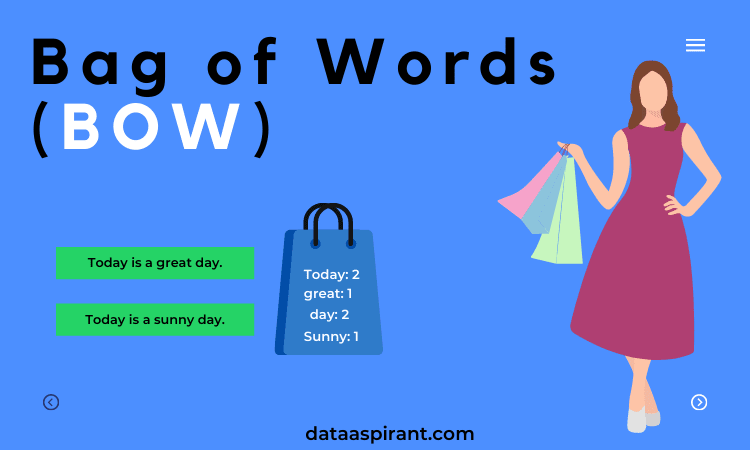

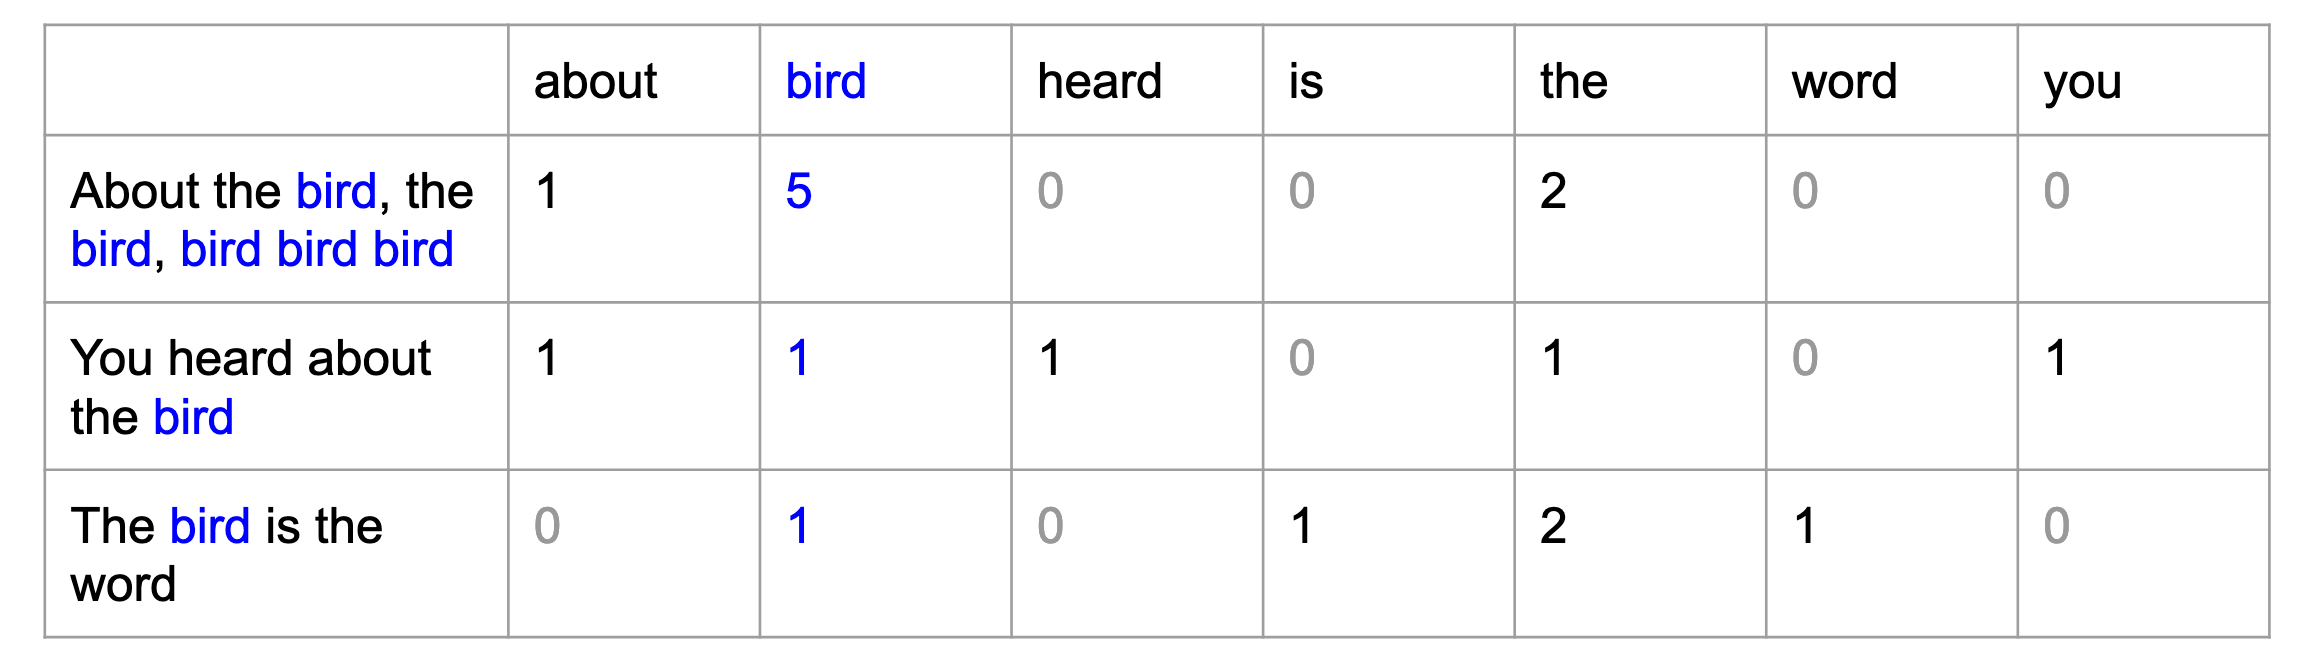

### Code

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() # memanggil class untuk method BoW
X = vectorizer.fit_transform(textClean) # mentransform data review ke BoW

In [10]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)


Pada tahapan deployment
*   Object hasil pemanggilan class CountVectorizer (BoW) ini juga harus disimpan dengan format pickle
*   Fungsinya agar ketika data baru masuk, data tsb juga bisa diekstrak vektornya dengan CountVectorizer
*   **Kenapa tidak bikin baru saja object CountVectorizer di script model.py?**

Di bawah ini opsional. Hanya untuk melihat-lihat hasil ekstraksi fitur.

In [11]:
vectorizer.get_feature_names()[:5]

['abby', 'abdominal', 'able', 'about', 'absence']

## TF-IDF

[https://ted-mei.medium.com/demystify-tf-idf](https://ted-mei.medium.com/demystify-tf-idf-in-indexing-and-ranking-5c3ae88c3fa0)

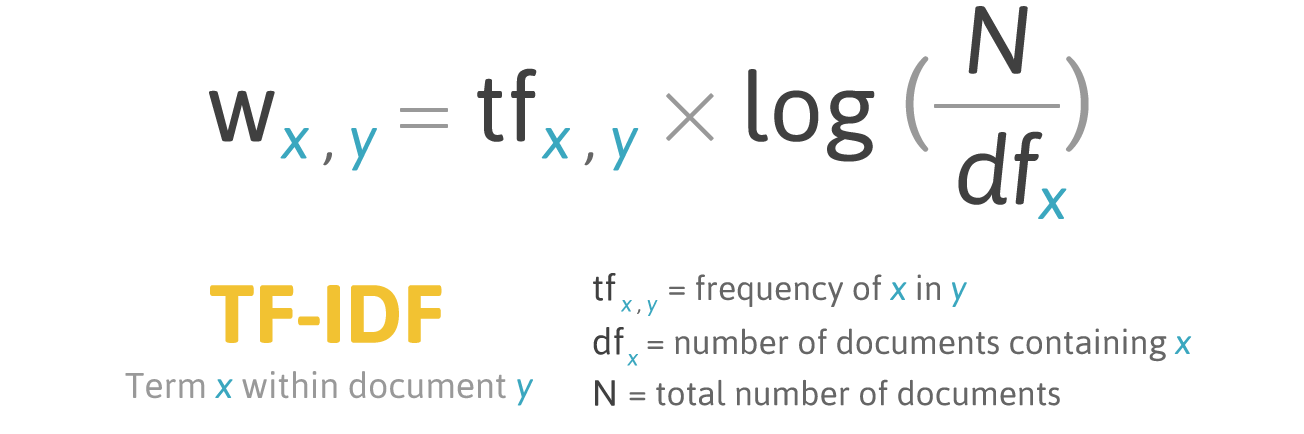

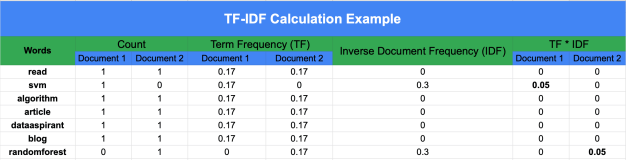

### Code

### Menyimpan X dan vectorizer

In [12]:
import pickle
path = 'G:\My Drive\Kuliah\Semester 6\Penambangan Data\Pertemuan 6'

In [13]:
pickle.dump(X,open(path+"/dataX.pkl",'wb'))

In [14]:
pickle.dump(vectorizer,open(path+'/dataVectorizer.pkl','wb'))

In [45]:
pickle.dump(textClean,open(path+'/dataClean.pkl','wb'))

FileNotFoundError: [Errno 2] No such file or directory: '/dataClean.pkl'

# Pemodelan Clustering (Next pertemuan)

In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(7, random_state=161).fit(X)
kmeans

KMeans(n_clusters=7, random_state=161)

In [16]:
kmeans.labels_.shape

(1000,)

In [17]:
#Vektor BoW dari Cluster Center
kmeans.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0012285 , 0.0012285 , 0.01965602, ..., 0.0012285 , 0.0012285 ,
        0.0012285 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.06451613,
        0.        ],
       [0.        , 0.        , 0.1875    , ..., 0.        , 0.125     ,
        0.        ],
       [0.        , 0.        , 0.01550388, ..., 0.        , 0.        ,
        0.        ]])

In [18]:
#melakukan sort pada vektor centroid
order_centroids = kmeans.cluster_centers_.argsort()[:,::-1]

In [19]:
terms = vectorizer.get_feature_names()
for i in range(5):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Cluster 0: chips
 kettle
 and
 potato
 flavors
 bag
 flavor
 flavour
 honey
 salt
Cluster 1: like
 good
 great
 taste
 product
 flavor
 tea
 love
 best
 use
Cluster 2: food
 dog
 like
 cats
 foods
 cat
 old
 eat
 baby
 dogs
Cluster 3: organic
 coffee
 tea
 like
 green
 ingredients
 water
 vitamin
 good
 use
Cluster 4: chips
 kettle
 flavor
 like
 bag
 potato
 salt
 taste
 great
 chip


## Plot dengan WordCloud

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [21]:
np.where(kmeans.labels_ == 0)

(array([446, 466, 467, 527, 528, 539, 571, 574, 602, 603], dtype=int64),)

In [22]:
np.where(kmeans.labels_ == 0)[0]

array([446, 466, 467, 527, 528, 539, 571, 574, 602, 603], dtype=int64)

In [23]:
np.where(kmeans.labels_ == 0)[0].tolist()

[446, 466, 467, 527, 528, 539, 571, 574, 602, 603]

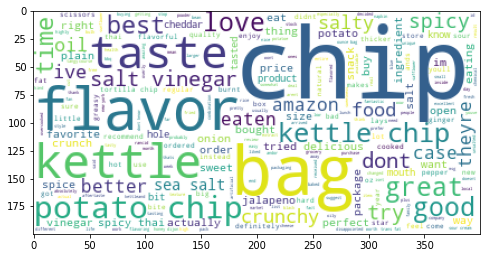

<Figure size 432x288 with 0 Axes>

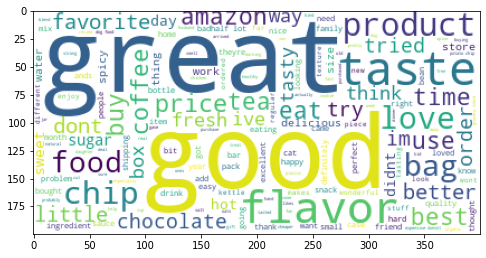

<Figure size 432x288 with 0 Axes>

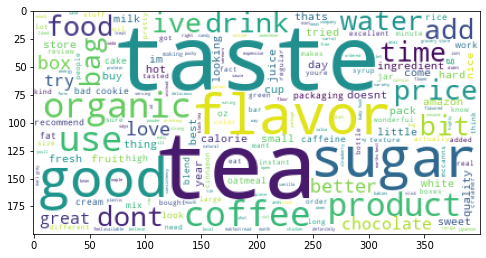

<Figure size 432x288 with 0 Axes>

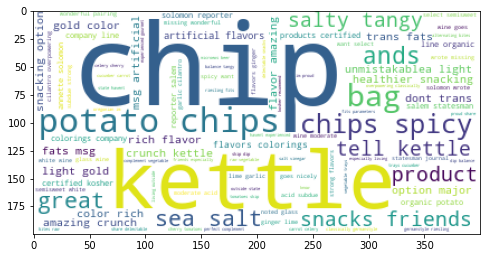

<Figure size 432x288 with 0 Axes>

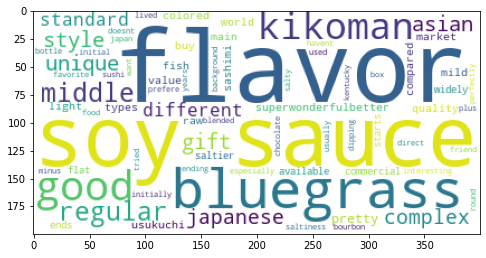

<Figure size 432x288 with 0 Axes>

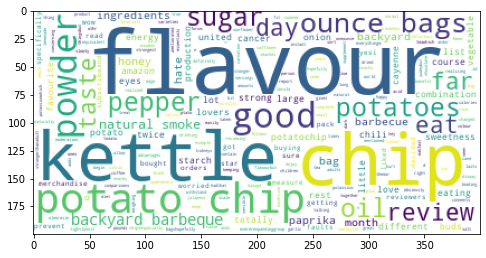

<Figure size 432x288 with 0 Axes>

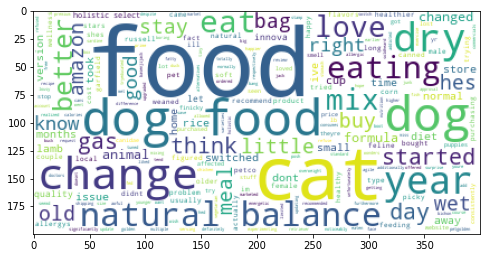

<Figure size 432x288 with 0 Axes>

In [44]:
terms = vectorizer.get_feature_names()
for i in range(7):
    clusterId = np.where(kmeans.labels_ == i)[0].tolist()
    clusterText = "".join([textClean[i] for i in clusterId])
    plt.figure(figsize=(8,10)) # ngeset ukuran gambar
    wf = WordCloud(background_color='white',max_words=1000,random_state=113).generate(clusterText)
    plt.imshow(wf)
    plt.show()
    wf.to_file("templates/word{}.png".format(i))
    plt.savefig('templates/image.png')

In [24]:
# menyimpan index dari tiap review sesuai cluster
cluster0id = np.where(kmeans.labels_ == 0)[0].tolist()
cluster1id = np.where(kmeans.labels_ == 1)[0].tolist()
cluster2id = np.where(kmeans.labels_ == 2)[0].tolist()
cluster3id = np.where(kmeans.labels_ == 3)[0].tolist()
cluster4id = np.where(kmeans.labels_ == 4)[0].tolist()

# simpan data review sesuai cluster ke list, join agar mjd string
cluster0text = "".join([textClean[i] for i in cluster0id])
cluster1text = "".join([textClean[i] for i in cluster1id])
cluster2text = "".join([textClean[i] for i in cluster2id])
cluster3text = "".join([textClean[i] for i in cluster3id])
cluster4text = "".join([textClean[i] for i in cluster4id])

In [25]:
cluster0text

'fan kettle chips open bag kettle chips know going quality chips exception live printed package  new york cheddar chips subtle flavor taste cheddar doesnt smack face like supermarket and chips taste lingers definite plus  aspect kettle chips fact chip nice crisp crunch mouth burnt chips bags purchase negative flavoring chips uneven chips pack nice cheddar punch taste plain isnt big flaw happens getting seasoned doesnt ruin bag all  overall quality chips fantastic flavor great wont disappointed especially cheddar loverim addicted salty tangy flavors opened bag sea salt vinegar kettle and chips knew perfect complement vegetable trays cucumber carrot celery cherry tomatoes skip dip balance tangy chips alternating bites raw vegetable  oregonian im proud share delectable snacks friends especially living outside state havent experienced gourmet chips tell kettle and potato chips microews beer  kettle and potato chips unmistakablea light gold color rich flavor amazing crunch kettle and chips 

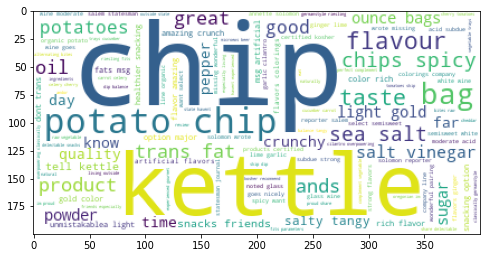

In [31]:
# ngeplot wordcloud
plt.figure(figsize=(8,10)) # ngeset ukuran gambar
wf = WordCloud(background_color='white',max_words=1000,random_state=113).generate(cluster0text)
plt.imshow(wf)
plt.show()
wf.to_file("word1.png")

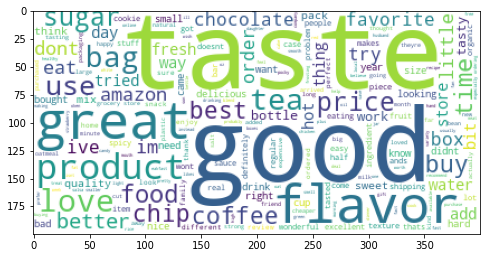

In [32]:
# ngeplot wordcloud
plt.figure(figsize=(8,10)) # ngeset ukuran gambar
wf = WordCloud(background_color='white',max_words=1000,random_state=113).generate(cluster1text)
plt.imshow(wf)
plt.show()
wf.to_file('word2.png')

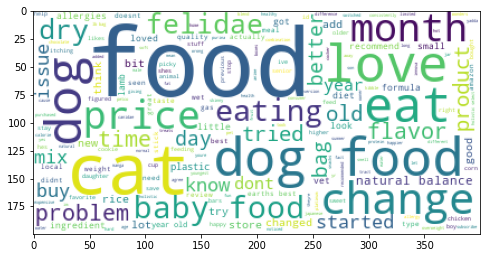

In [33]:
# ngeplot wordcloud
plt.figure(figsize=(8,10)) # ngeset ukuran gambar
wf = WordCloud(background_color='white',max_words=1000,random_state=113).generate(cluster2text)
plt.imshow(wf)
plt.show()
wf.to_file('word3.png')